# Tổng quan phần tiền xử lý và khám phá dữ liệu

- Xử lí thiếu dữ liệu

- Xử lí nhiễu

- Chuẩn hóa dữ liệu

- Đưa ra những cái nhìn đầu tiên về dữ liệu

## 1. Import libraries

In [1]:
#import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Data pre-precessing and exploration

- Đọc dữ liệu từ data/raw_dataset.csv

In [3]:
raw_data = pd.read_csv('../data/raw_dataset.csv')
raw_data.sample(5)

,Liên kết,Tên công ty,Tên công việc,Mức lương,Khu vực tuyển,Cấp bậc,Số lượng tuyển,Hình thức làm việc,Yêu cầu bằng cấp,Yêu cầu kinh nghiệm,Ngành nghề,Địa điểm làm việc,Mô tả công việc,Yêu cầu công việc,Quyền lợi,Từ khóa,Địa chỉ công ty,Quy mô công ty
434,https://vieclam24h.vn/ban-hang-kinh-doanh/nhan...,Công Ty Cổ Phần Meritronics Việt Nam - Chi Nhá...,Nhân Viên Kinh Doanh,8 - 10 triệu,Hà Nội,Chuyên viên- nhân viên,2,Toàn thời gian cố định,Đại học,1 năm,Bán hàng - Kinh doanh,"Hà Nội, BT 2-15, KĐT mới Trung Văn, Nam Từ Liêm","- Nghiên cứu thị trường đê định vị sản phẩm, t...",- Giới tính: Nam Nữ. Độ tuổi: 20-25t. - Kỹ năn...,- Mức lương: 8 - 10 triệu- Thưởng theo KPI cả ...,huyện từ liêmgiám sát tạp vụkhu công nghiệp từ...,"BT2-15, KĐT mới Trung Văn, Nam Từ Liêm, Hà Nội",10 - 150 người
111,https://vieclam24h.vn/y-te-cham-soc-suc-khoe/d...,CÔNG TY TNHH MỘT THÀNH VIÊN VĂCXIN VÀ SINH PHẨ...,Điều Dưỡng Viên,15 - 20 triệu,Hà Nội,Chuyên viên- nhân viên,3,Toàn thời gian cố định,Trung cấp,1 năm,Y tế - Chăm sóc sức khỏe/Dược phẩm,"Hà Nội, Số 1 Yecxanh – Phường Phạm Đình Hổ, Ha...",- Thực hiện tiêm chủng an toàn theo quy định.-...,"- Tốt nghiệp cử nhân/trung cấp điều dưỡng, y s...",- Mức lương cạnh tranh- Môi trường làm việc ch...,Việc làm Hà NộiY tế - Chăm sóc sức khỏeCÔNG TY...,Số 1 Yecxanh - Phường Phạm Đình Hổ - Quận Hai ...,150 - 300 người
1336,https://vieclam24h.vn/ban-si-ban-le-quan-ly-cu...,Highlands Coffee Service Jsc (Công Ty Cổ Phần ...,Revenue Accountant / Kế Toán Doanh Thu (Tempor...,10 - 12 triệu,TP.HCM,Chuyên viên- nhân viên,1,Toàn thời gian cố định,Cao đẳng,2 năm,Bán sỉ - Bán lẻ - Quản lý cửa hàng/Kế toán/Thự...,"TP.HCM, 127 Nguyễn Cơ Thạch, An Lợi Đông, Quận...",Responsible for tracking and reporting on the ...,Job Requirements:1) Education/ Training Qualif...,Bao Viet health insuranceReivew annual salary....,kế toántoánkế toán thu chiViệc làm TP.HCMBán s...,"123-127 Nguyễn Cơ Thạch, Phường An Lợi Đông, Q...",Trên 300 người
629,https://vieclam24h.vn/ban-hang-kinh-doanh/ha-n...,Công ty Tài Chính TNHH HD SAISON,[Hà Nội] Nhân Viên Telesales,12 - 30 triệu,Hà Nội,Chuyên viên- nhân viên,30,Toàn thời gian cố định,Trung học,Dưới 1 năm,Bán hàng - Kinh doanh/Chăm sóc khách hàng/Ngân...,"Hà Nội, Tầng 3 tòa nhà VIT 519 Kim Mã, Ba Đình",1. Bán hàng qua điện thoại- Nhận cuộc gọi vào:...,- Tốt nghiệp trung học phổ thông trở lên;- Có ...,Thử việc 100% lương;Ký hợp đồng lao động chính...,nhân viên telesalestelesales tại hà nộitelesal...,"Tầng 3 tòa nhà VIT 519 Kim Mã, Ba Đình, Hà Nội",Trên 300 người
249,https://vieclam24h.vn/an-ninh-bao-ve/nhan-vien...,Công Ty TNHH Dịch Vụ Bảo Vệ Võ Anh,Nhân Viên Bảo Vệ Làm Việc Tại Quận Gò Vấp,7 - 11 triệu,TP.HCM,Chuyên viên- nhân viên,15,Toàn thời gian cố định,Trung học,Chưa có kinh nghiệm,An ninh - Bảo vệ/Lao động phổ thông/Nghề nghiệ...,"TP.HCM, Gò Vấp; TP.HCM, Bình Thạnh",- Đảm bảo an ninh cho nhân sự và tài sản của c...,- Nam tuổi từ 18 đến dưới 55 tuổi - Không hình...,- Lương từ 7-11 triệu- Hỗ trợ nhà đội và tiền ...,gò vấpquận gò vấp thành phố hồ chí minhViệc là...,"99,đường 3,KP 3,Phường Cát Lái,Tp.Thủ Đức,Tp.H...",10 - 150 người


- Đầu tiên chúng ta cần một cái nhìn tổng quan về dữ liệu này

In [17]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1910 entries, 0 to 1909
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Liên kết             1910 non-null   object
 1   Tên công ty          1910 non-null   object
 2   Tên công việc        1910 non-null   object
 3   Mức lương            1910 non-null   object
 4   Khu vực tuyển        1910 non-null   object
 5   Cấp bậc              1910 non-null   object
 6   Số lượng tuyển       1910 non-null   int64 
 7   Hình thức làm việc   1910 non-null   object
 8   Yêu cầu bằng cấp     1681 non-null   object
 9   Yêu cầu kinh nghiệm  1910 non-null   object
 10  Ngành nghề           1910 non-null   object
 11  Địa điểm làm việc    1910 non-null   object
 12  Mô tả công việc      1910 non-null   object
 13  Yêu cầu công việc    1910 non-null   object
 14  Quyền lợi            1910 non-null   object
 15  Từ khóa              1910 non-null   object
 16  Địa ch

**Giải thích ý nghĩa các cột trong raw data và khám phá kiểu dữ liệu cũng như định dạng của chúng:**
0. Liên kết : Liến đển đến trang tuyển dụng của trang web
1. Tên công ty: Tên công ty tuyển dụng
- Dự vào tên công ty ta thấy có 3 loại công ty là công ty cổ phần, công ty trách nhiệm hữu han và công ty tư nhân.
2. Tên công việc : Tên công việc đang cần uyển dụng
3. Mức lương: Mức lương tuyển dụng theo định dạng như:  **'7 - 10 triệu'**
4. Khu vực tuyển dụng: Đó là một list các tỉnh thành được ngăn cách nhau bởi dấu ,
5. Cấp bậc: Cấp bậc của công việc đang tuyển dụng
6. Số lượng tuyển: có kiểu **int64**
7. Hình thức làm việc
8. Yêu cầu bằng cấp
9. Yêu cầu kinh nghiệm: '1 năm', '2 năm', ...
10. Ngành nghề: Là một list các ngành nghề được ngăn cách nhau bởi dấu / 'Bán hàng - Kinh doanh/Bất động sản/Bảo hiểm'
11. Điah điểm làm việc: Địa chỉ cụ thể của nơi làm việc
12. Mô tả công việc: Mô tả công việc đang tuyển dụng
13. Quyền lợi được hưởng: Quyền lợi được hưởng khi làm việc tại công ty
14. Từ khóa: Từ khóa của công việc đang tuyển dụng
15. Địa chỉ công ty: Địa chỉ công ty
16. Quy mô công ty: Quy mô công ty
 

= > Để tiếp tực khám phá dữ liệu ta cần phải loại bở những cột không cần thiết, xử lý những cột còn thiếu dữ liệu, những cột có dữ liệu nhiễu, những cột có dữ liệu không chuẩn.

- Vì có một số công việc được đăng tuyển dụng nhiều lần nhưng mỗi lần đăng thì giá trị cột liên kết sẽ khác nhau nên việc kiểm tra trùng lặp dữ liệu sẽ được nhóm thực hiện sau khi đã loại bỏ cột này

- Có thể thấy dữ liệu khá đầy đủ chỉ riêng cột 'Yêu cầu bằng cấp' có thiếu dữ liệu. Vậy chúng ta sẽ xử lí cột này.

In [18]:
raw_data['Yêu cầu bằng cấp'].value_counts()

Cao đẳng     569
Trung học    418
Trung cấp    346
Đại học      325
Chứng chỉ     23
Name: Yêu cầu bằng cấp, dtype: int64

- Đây là một tiêu chí khá quan trọng khi tuyển hoặc tìm việc làm vì vậy khi trường này trống thì có thể hiểu được trong trường hợp này sẽ do phần lớn công việc không có yêu cầu về bằng cấp. Vậy ta sẽ điền 'Không' vào các vị trí bị thiếu dữ liệu.

In [19]:
raw_data['Yêu cầu bằng cấp'].replace(np.nan, 'Không', inplace=True)

- Một số cột không có nhiều giá trị trong quá trình phân tích của nhóm, hoặc dữ liệu không theo quy chuẩn khó khai thác như: 'Liên kết', 'Mô tả công việc', 'Quyền lợi', 'Yêu cầu công việc', 'Từ khóa'. Sẽ được nhóm bỏ qua trong đồ án này.

In [4]:
raw_data.drop(['Liên kết', 'Mô tả công việc', 'Quyền lợi', 'Yêu cầu công việc', 'Từ khóa'], axis=1, inplace=True)
raw_data.head(5)

,Tên công ty,Tên công việc,Mức lương,Khu vực tuyển,Cấp bậc,Số lượng tuyển,Hình thức làm việc,Yêu cầu bằng cấp,Yêu cầu kinh nghiệm,Ngành nghề,Địa điểm làm việc,Địa chỉ công ty,Quy mô công ty
0,Công Ty TNHH Dksh Việt Nam,Giám Sát Kinh Doanh - Ngành Sữa (Kênh GT),22 - 25 triệu,"TP.HCM, Đồng Nai",Quản lý nhóm- giám sát,5,Toàn thời gian cố định,Trung cấp,1 năm,Bán sỉ - Bán lẻ - Quản lý cửa hàng/Bán hàng - ...,"TP.HCM, Toàn khu vực Các Quận Huyện, Quận 10; ...","Viettel Complex, 285 Cach Mang Thang Tam, Phườ...",Trên 300 người
1,Gara Oto Kim Quế - Chi Nhánh Công Ty Cổ Phần V...,"Nhân Viên Kỹ Thuật Sửa Chữa, Bảo Dưỡng Ô Tô",10 - 20 triệu,Hà Nội,Chuyên viên- nhân viên,5,Toàn thời gian cố định,NaN,3 năm,Cơ khí - Ô tô - Tự động hóa/Khoa học - Kỹ thuật,"Hà Nội, Tổ 4 - Thị trấn Đông Anh, Đông Anh",Tổ 4 - Thị trấn Đông Anh - Huyện Đông Anh - Th...,10 - 150 người
2,Công Ty CP Thang Máy Và Thiết Bị Thành Công,Trưởng Phòng Kinh Doanh,20 - 30 triệu,Hà Nội,Quản lý cấp trung,1,Toàn thời gian cố định,Cao đẳng,2 năm,Bán hàng - Kinh doanh/Bán sỉ - Bán lẻ - Quản l...,"Hà Nội, Số 7A Mạc Thị Bưởi, Phường Vĩnh Tuy, H...","Số 7A Mạc Thị Bưởi, Phường Vĩnh Tuy, Quận Hai ...",10 - 150 người
3,Trường Mẫu Giáo - TH - THCS - THPT Văn Lang (C...,Phó Hiệu Trưởng Chuyên Môn Trung Học,25 - 30 triệu,TP.HCM,Quản lý cấp trung,1,Toàn thời gian cố định,Đại học,3 năm,Giáo dục - Đào tạo/Quản lý dự án/Nghề nghiệp khác,"TP.HCM, 84 Tân Hưng, Phường 12, Quận 5","84 Tân Hưng, Phường 12, Quận 5, Thành phố Hồ C...",150 - 300 người
4,Công Ty TNHH Cheng Loong Bình Dương Paper,Nhân Viên Văn Phòng (Biết Tiếng Hoa) - Tại Bìn...,9.5 - 15 triệu,Bình Dương,Chuyên viên- nhân viên,2,Toàn thời gian cố định,Chứng chỉ,Chưa có kinh nghiệm,Hành chính - Thư ký/Biên phiên dịch,"Bình Dương, Khu số 4, KCN Quốc tế Protrade, An...","Khu số 4, KCN quốc tế protrade, Xã An Tây, Bế...",Trên 300 người


- Kiểm tra trùng lặp dữ liệu

In [5]:
is_duplicate = raw_data.duplicated().any()
if is_duplicate:
    print("Có sự trùng lặp dữ liệu")
else:
    print("Không có sự trùng lặp dữ liệu")

Có sự trùng lặp dữ liệu


- Có sự trùng lặp trong bộ dữ liệu nên chúng ta sẽ phải xử lí

In [6]:
#remove duplicate
raw_data.drop_duplicates(inplace=True)
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1907 entries, 0 to 1915
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Tên công ty          1907 non-null   object
 1   Tên công việc        1907 non-null   object
 2   Mức lương            1907 non-null   object
 3   Khu vực tuyển        1907 non-null   object
 4   Cấp bậc              1907 non-null   object
 5   Số lượng tuyển       1907 non-null   int64 
 6   Hình thức làm việc   1907 non-null   object
 7   Yêu cầu bằng cấp     1669 non-null   object
 8   Yêu cầu kinh nghiệm  1907 non-null   object
 9   Ngành nghề           1907 non-null   object
 10  Địa điểm làm việc    1907 non-null   object
 11  Địa chỉ công ty      1907 non-null   object
 12  Quy mô công ty       1907 non-null   object
dtypes: int64(1), object(12)
memory usage: 208.6+ KB


- Tiếp đến chúng ta cần xử lý cột lương để đưa cột này về một giá trị có kiểu dữ liệu np.float64 thay vì object. Vì các giá trị lương được định nghĩa là một khoảng 'a - b triệu' nhóm quyết định sẽ lấy lương là trung bình của khoảng này. Bên cạnh đó còn có một số công việc để mức lương này có giá trị là 'Thỏa thuận', vì số lượng này không nhiều nên nhóm quyết định sẽ loại bỏ các công việc này.

In [7]:
df = raw_data[raw_data['Mức lương'] == 'Thoả thuận ']
df.shape
#Chỉ có 15 trường hợp như thế này 
#=> Xóa các trường hợp này đi
raw_data.drop(df.index, inplace=True)

In [8]:
def process_salary(salary):
    try:
        a, b = salary.split(' - ')
        # print(a, b)
        a = float(a)
        b = float(b.replace(' triệu', ''))
        return (a + b) / 2
    except:
        return salary
raw_data['Mức lương'] = raw_data['Mức lương'].apply(process_salary)
raw_data.head(5)

,Tên công ty,Tên công việc,Mức lương,Khu vực tuyển,Cấp bậc,Số lượng tuyển,Hình thức làm việc,Yêu cầu bằng cấp,Yêu cầu kinh nghiệm,Ngành nghề,Địa điểm làm việc,Địa chỉ công ty,Quy mô công ty
0,Công Ty TNHH Dksh Việt Nam,Giám Sát Kinh Doanh - Ngành Sữa (Kênh GT),23.50,"TP.HCM, Đồng Nai",Quản lý nhóm- giám sát,5,Toàn thời gian cố định,Trung cấp,1 năm,Bán sỉ - Bán lẻ - Quản lý cửa hàng/Bán hàng - ...,"TP.HCM, Toàn khu vực Các Quận Huyện, Quận 10; ...","Viettel Complex, 285 Cach Mang Thang Tam, Phườ...",Trên 300 người
1,Gara Oto Kim Quế - Chi Nhánh Công Ty Cổ Phần V...,"Nhân Viên Kỹ Thuật Sửa Chữa, Bảo Dưỡng Ô Tô",15.00,Hà Nội,Chuyên viên- nhân viên,5,Toàn thời gian cố định,NaN,3 năm,Cơ khí - Ô tô - Tự động hóa/Khoa học - Kỹ thuật,"Hà Nội, Tổ 4 - Thị trấn Đông Anh, Đông Anh",Tổ 4 - Thị trấn Đông Anh - Huyện Đông Anh - Th...,10 - 150 người
2,Công Ty CP Thang Máy Và Thiết Bị Thành Công,Trưởng Phòng Kinh Doanh,25.00,Hà Nội,Quản lý cấp trung,1,Toàn thời gian cố định,Cao đẳng,2 năm,Bán hàng - Kinh doanh/Bán sỉ - Bán lẻ - Quản l...,"Hà Nội, Số 7A Mạc Thị Bưởi, Phường Vĩnh Tuy, H...","Số 7A Mạc Thị Bưởi, Phường Vĩnh Tuy, Quận Hai ...",10 - 150 người
3,Trường Mẫu Giáo - TH - THCS - THPT Văn Lang (C...,Phó Hiệu Trưởng Chuyên Môn Trung Học,27.50,TP.HCM,Quản lý cấp trung,1,Toàn thời gian cố định,Đại học,3 năm,Giáo dục - Đào tạo/Quản lý dự án/Nghề nghiệp khác,"TP.HCM, 84 Tân Hưng, Phường 12, Quận 5","84 Tân Hưng, Phường 12, Quận 5, Thành phố Hồ C...",150 - 300 người
4,Công Ty TNHH Cheng Loong Bình Dương Paper,Nhân Viên Văn Phòng (Biết Tiếng Hoa) - Tại Bìn...,12.25,Bình Dương,Chuyên viên- nhân viên,2,Toàn thời gian cố định,Chứng chỉ,Chưa có kinh nghiệm,Hành chính - Thư ký/Biên phiên dịch,"Bình Dương, Khu số 4, KCN Quốc tế Protrade, An...","Khu số 4, KCN quốc tế protrade, Xã An Tây, Bế...",Trên 300 người


- Các giá trị thống kê của cột 'Lương' được thể hiện như sau

In [9]:
salary_profile = pd.DataFrame(raw_data['Mức lương'].describe())
salary_profile

,Mức lương
count,1892.000000
mean,12.958615
std,9.681220
min,0.150000
25%,9.000000
50%,11.500000
75%,15.000000
max,252.000000


- Tiếp đến, ta sẽ xem xét các công việc này nằm trong những ngành nghề, lĩnh vực nào

In [10]:
carreer = pd.Series(raw_data['Ngành nghề'].str.split('/').explode().str.strip())
num_carreer = carreer.nunique()
print('Số ngành nghề: ', num_carreer)
carreer_value = pd.DataFrame(carreer.value_counts())
carreer_value.reset_index(inplace=True)
carreer_value.columns = ['Ngành nghề', 'Số lượng']
carreer_value

Số ngành nghề:  51


,Ngành nghề,Số lượng
0,Bán hàng - Kinh doanh,837
1,Chăm sóc khách hàng,343
2,Tài chính - Đầu tư - Chứng Khoán,313
3,Bán sỉ - Bán lẻ - Quản lý cửa hàng,305
4,Hành chính - Thư ký,238
5,Ngân hàng,225
6,Kế toán,187
7,Khoa học - Kỹ thuật,171
8,Marketing,169
9,Lao động phổ thông,142


- Xét 10 ngành nghề có số lượng công việc tuyển cao nhất

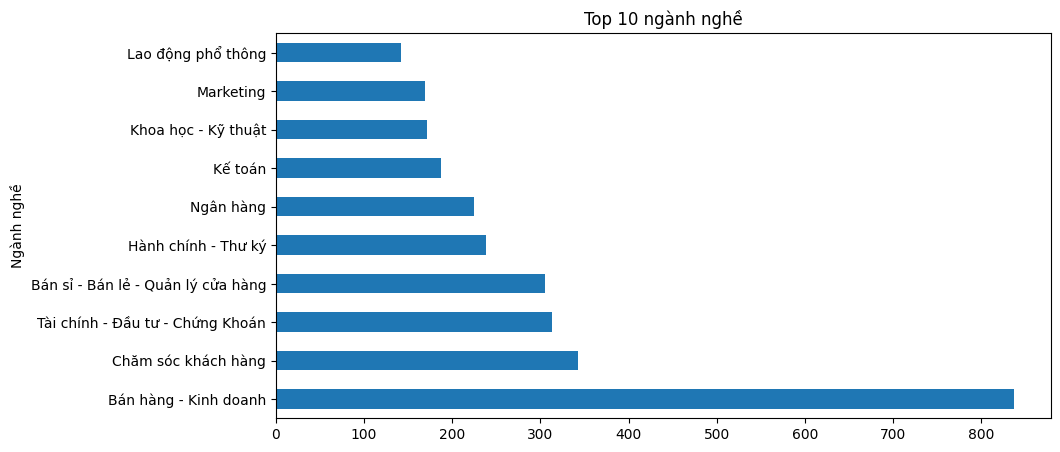

In [11]:
top10_carreer = carreer.value_counts().head(10)
top10_carreer.plot(kind='barh', figsize=(10, 5), title='Top 10 ngành nghề');

- Các công việc này sẽ có yêu cầu bằng cấp như thế nào?

In [12]:
degree_requirements = pd.DataFrame(raw_data['Yêu cầu bằng cấp'].value_counts())
degree_requirements.reset_index(inplace=True)
degree_requirements.columns = ['Yêu cầu bằng cấp', 'Số lượng']
degree_requirements

,Yêu cầu bằng cấp,Số lượng
0,Cao đẳng,562
1,Trung học,428
2,Trung cấp,335
3,Đại học,303
4,Chứng chỉ,26


- Các công việc này có yêu cầu về kinh nghiệm làm việc không?

In [13]:
exp_requirements = pd.DataFrame(raw_data['Yêu cầu kinh nghiệm'].value_counts())
exp_requirements.reset_index(inplace=True)
exp_requirements.columns = ['Yêu cầu kinh nghiệm', 'Số lượng']
exp_requirements

,Yêu cầu kinh nghiệm,Số lượng
0,Chưa có kinh nghiệm,591
1,1 năm,517
2,Dưới 1 năm,382
3,2 năm,247
4,3 năm,110
5,5 năm,29
6,4 năm,11
7,Hơn 5 năm,5
